In [1]:
import pandas as pd
import numpy as np

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final data\\'

#Loading Date to week id map

data= pd.read_excel(loc + 'Inventory_final.xlsx', index_col=False)
data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,year_month,net Sales,Temperature,Holiday
0,2020-01-01,74,11,others,111,Maharashtra,0,49,2.94,2012-01,0.00,26,0
1,2020-01-01,337,11,others,111,Maharashtra,1,49,7.44,2012-01,7.44,26,0
2,2020-01-01,423,12,others,111,Maharashtra,0,49,0.97,2012-01,0.00,26,0
3,2020-01-01,432,12,others,111,Maharashtra,0,49,4.97,2012-01,0.00,26,0
4,2020-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88,2012-01,0.00,26,0


In [3]:
data= data.rename(columns={'product_identifier': 'Product_ID','department_identifier': 'Sub_Category',\
                           'category_of_product': 'Product_Category', 'outlet': 'Store', 'net Sales': 'Total_Revenue', \
                          'sales': 'Units_Sold', 'sell_price': 'Unit_Price'})
data.head()

,date,Product_ID,Sub_Category,Product_Category,Store,state,Units_Sold,week_id,Unit_Price,year_month,Total_Revenue,Temperature,Holiday
0,2020-01-01,74,11,others,111,Maharashtra,0,49,2.94,2012-01,0.00,26,0
1,2020-01-01,337,11,others,111,Maharashtra,1,49,7.44,2012-01,7.44,26,0
2,2020-01-01,423,12,others,111,Maharashtra,0,49,0.97,2012-01,0.00,26,0
3,2020-01-01,432,12,others,111,Maharashtra,0,49,4.97,2012-01,0.00,26,0
4,2020-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88,2012-01,0.00,26,0


In [5]:
data["date"] = pd.to_datetime(data["date"]) # convert to datetime
data['week'] =data['date'].dt.week
data['month'] =data['date'].dt.month 
data['year'] =data['date'].dt.year

C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_16224\373335938.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] =data['date'].dt.week


In [6]:
data.head()

,date,Product_ID,Sub_Category,Product_Category,Store,state,Units_Sold,week_id,Unit_Price,year_month,Total_Revenue,Temperature,Holiday,week,month,year
0,2020-01-01,74,11,others,111,Maharashtra,0,49,2.94,2012-01,0.00,26,0,1,1,2020
1,2020-01-01,337,11,others,111,Maharashtra,1,49,7.44,2012-01,7.44,26,0,1,1,2020
2,2020-01-01,423,12,others,111,Maharashtra,0,49,0.97,2012-01,0.00,26,0,1,1,2020
3,2020-01-01,432,12,others,111,Maharashtra,0,49,4.97,2012-01,0.00,26,0,1,1,2020
4,2020-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88,2012-01,0.00,26,0,1,1,2020


In [68]:
data.columns

Index(['Product_ID', 'Sub_Category', 'Product_Category', 'Store', 'state',
       'Units_Sold', 'week_id', 'Unit_Price', 'year_month', 'Total_Revenue',
       'Temperature', 'Holiday', 'week', 'month', 'year'],
      dtype='object')

In [69]:
#Correlation
df_new= data[['Product_ID', 'Sub_Category', 'Product_Category', 'Units_Sold', 'Unit_Price', 'Total_Revenue', \
             'Holiday', 'week', 'month', 'year']]

In [70]:
corr = df_new.corr()

<AxesSubplot:>

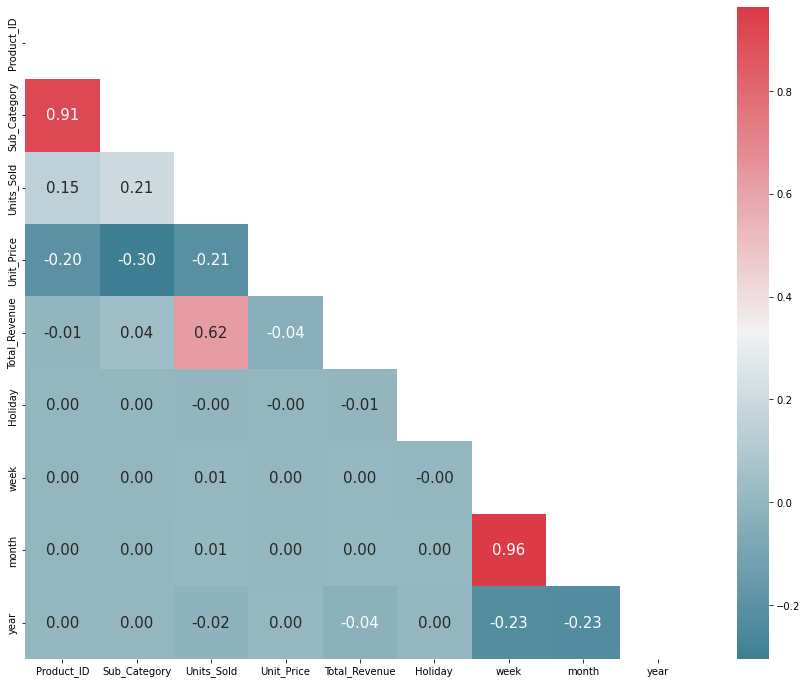

In [75]:
f, ax = plt.subplots(figsize= (15,12))
mask = np.triu(np.ones_like(corr, dtype= bool))
cmap= sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, annot=True, mask= mask, cmap= cmap, annot_kws= {'size':15}, linecolor = 'black', fmt= '.2f')

In [8]:
data.set_index('date', inplace=True) #seting date as index

In [10]:
# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

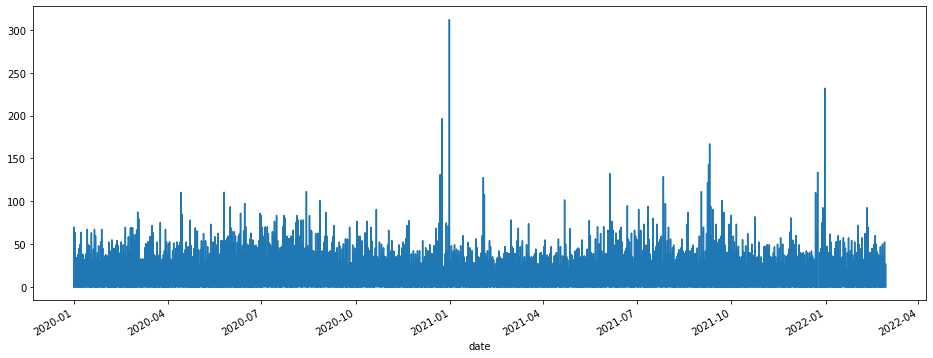

In [11]:
#Plotting sales 

plt.figure(figsize=(16,6))
data['Total_Revenue'].plot()
plt.show()

In [12]:
df_week = data.resample('W').mean() #resample data as weekly

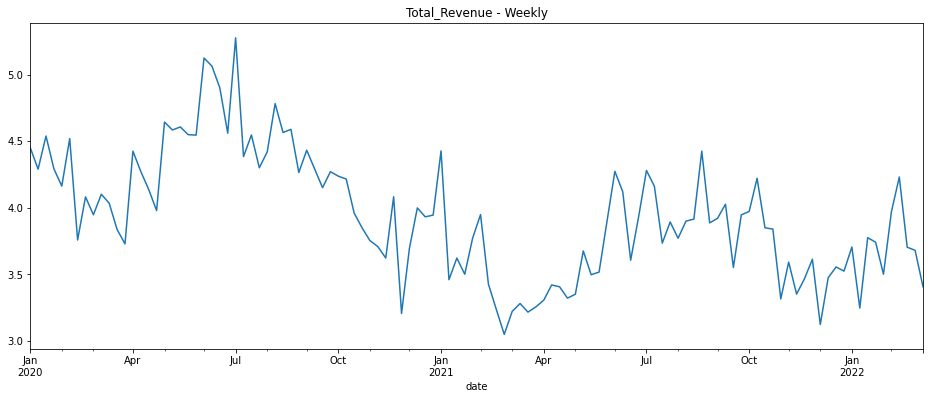

In [13]:
plt.figure(figsize=(16,6))
df_week['Total_Revenue'].plot()
plt.title('Total_Revenue - Weekly')
plt.show()

In [14]:
#My data is non-stationary. So, I will try to find more stationary version on it.

# finding 2-weeks rolling mean and std
roll_mean = df_week['Total_Revenue'].rolling(window=2, center=False).mean()
roll_std = df_week['Total_Revenue'].rolling(window=2, center=False).std()

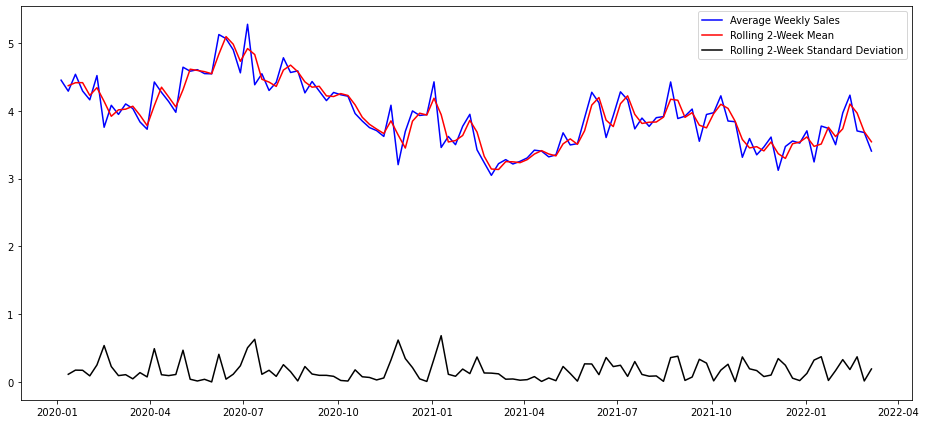

In [15]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Total_Revenue'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
#!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [18]:
#Adfuller Test to Make Sure: Augmented Dickey Fuller test (ADF Test) is a common 
#statistical test used to test whether a given Time series is stationary or not.


adfuller(df_week['Total_Revenue'])

(-1.7937986937634758,
 0.3835447874456672,
 3,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 38.27068908685382)

From test and my observations my data is not stationary. So, I will try to find more stationary version of it.

In [28]:
df_week= df_week.rename(columns= {'Total_Revenue': 'Weekly_Sales'})

In [29]:
#To take train-test splits continuosly, I split them manually, not random.

train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

In [30]:
print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (79, 12)
Test: (35, 12)


In [31]:
df_week.columns

Index(['Product_ID', 'Sub_Category', 'Store', 'Units_Sold', 'week_id',
       'Unit_Price', 'Weekly_Sales', 'Temperature', 'Holiday', 'week', 'month',
       'year'],
      dtype='object')

In [32]:
df_week.head()

,Product_ID,Sub_Category,Store,Units_Sold,week_id,Unit_Price,Weekly_Sales,Temperature,Holiday,week,month,year
date,,,,,,,,,,,,
2020-01-05,1509.96,24.46,112.5,1.455000,49.000000,4.942450,4.452960,25.400000,0.000000,1.0,1.000000,2020.0
2020-01-12,1509.96,24.46,112.5,1.443571,49.857143,4.939236,4.290457,22.428571,0.000000,2.0,1.000000,2020.0
2020-01-19,1509.96,24.46,112.5,1.477143,50.857143,4.938700,4.539557,22.000000,0.000000,3.0,1.000000,2020.0
2020-01-26,1509.96,24.46,112.5,1.381429,51.857143,4.938700,4.293193,23.714286,0.142857,4.0,1.000000,2020.0
2020-02-02,1509.96,24.46,112.5,1.289286,52.857143,4.938700,4.163286,24.714286,0.000000,5.0,1.285714,2020.0


In [33]:
#df_week= df_week.rename(columns= {'Total_Revenue': 'Weekly_Sales'})

In [34]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price



In [35]:
X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [38]:
X_train.shape, y_train.shape

((79, 11), (79,))

In [40]:
X_test.shape, y_test.shape

((35, 11), (35,))

In [41]:
#Decomposing Weekly Data to Observe Seasonality

decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data


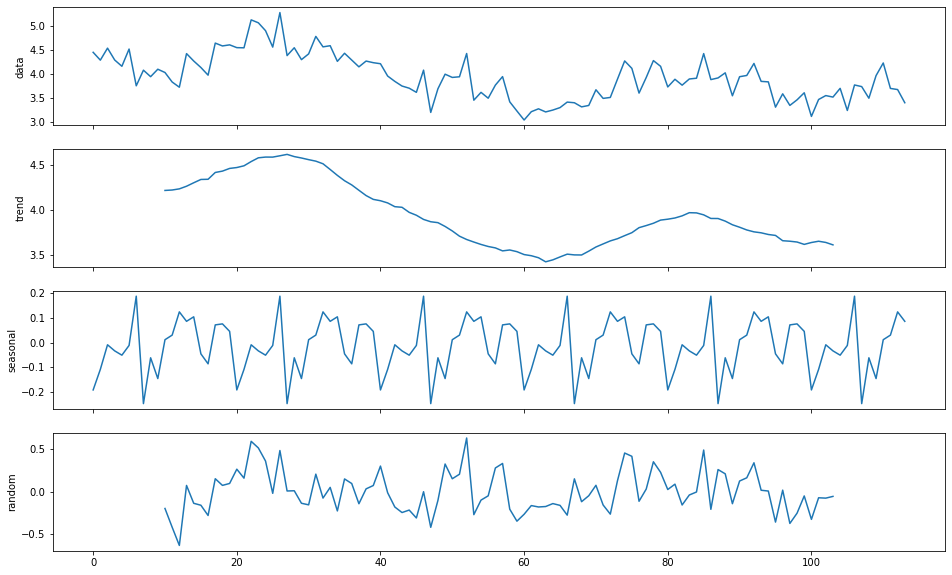

In [42]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.

In [43]:
#Make Data More Stationary

df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [44]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

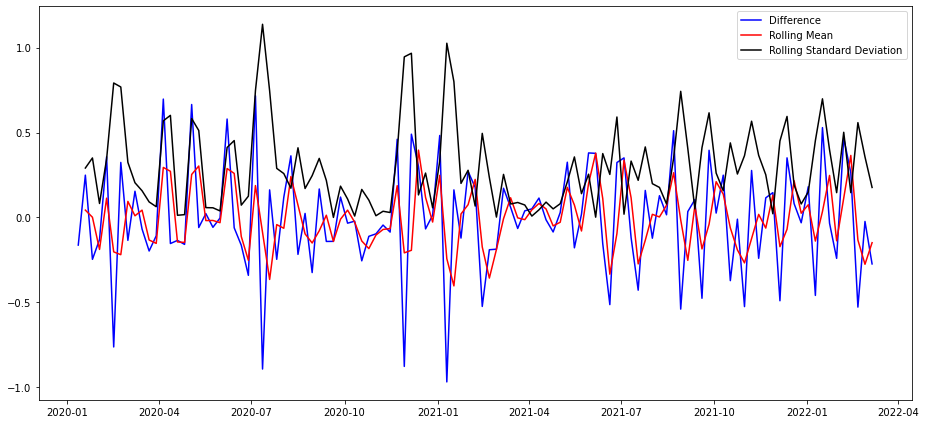

In [45]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [46]:
df_week_diff.head()

date
2020-01-12   -0.162503
2020-01-19    0.249100
2020-01-26   -0.246364
2020-02-02   -0.129907
2020-02-09    0.357300
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [47]:
#Shift

df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [48]:
df_week_lag

date
2020-01-12    4.452960
2020-01-19    4.290457
2020-01-26    4.539557
2020-02-02    4.293193
2020-02-09    4.163286
                ...   
2022-02-06    3.501136
2022-02-13    3.969686
2022-02-20    4.231621
2022-02-27    3.704043
2022-03-06    3.680621
Freq: W-SUN, Name: Weekly_Sales, Length: 113, dtype: float64

In [49]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

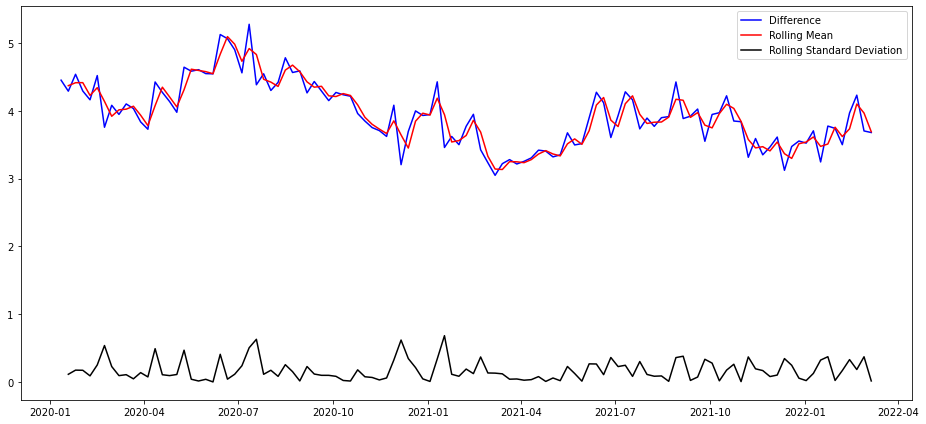

In [50]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [51]:
#Log

logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data


In [52]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

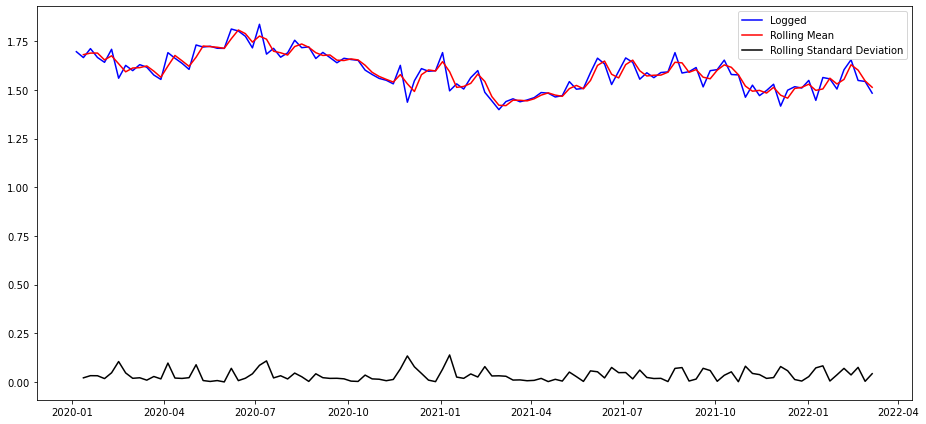

In [53]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

tried data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data.

__Train-Test Split__

In [55]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [56]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=51.407, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=33.898, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=35.871, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=37.013, Time=0.17 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=36.151, Time=0.17 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=37.605, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=39.218, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=35.877, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=36.560, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=37.131, Time=0.29 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=37.761, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=37.639, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=37.611, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=36.202, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=3

In [57]:
model_auto_arima.fit(train_data_diff)

ARIMA(maxiter=200, order=(0, 0, 1), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [78]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Arima_Pred'])

In [79]:
y_pred

,Arima_Pred
date,
2021-07-11,NaN
2021-07-18,-0.053798
2021-07-25,-0.003611
2021-08-01,-0.003611
2021-08-08,-0.003611
2021-08-15,-0.003611
2021-08-22,-0.003611
2021-08-29,-0.003611
2021-09-05,-0.003611


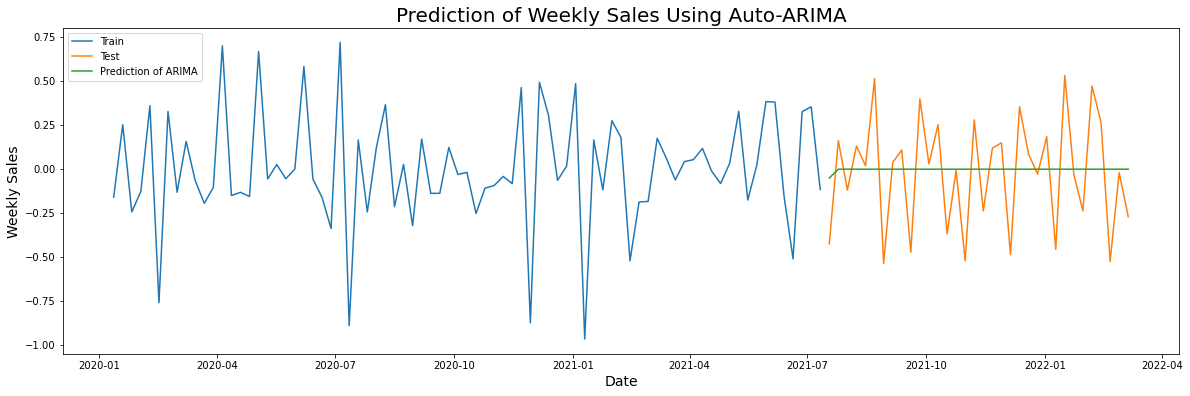

In [60]:
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

### ExponentialSmoothing

In [ ]:
'''
 Holt-Winters models according tp my data. Exponential Smooting are used when data has trend, and 
 it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to
 a constant value in the future.
'''


'''
My difference data has some minus and zero values, so I used additive seasonal and trend instead of multiplicative.
Seasonal periods are chosen from the decomposed graphs above. For tuning the model with iterations take too much time so,
I changed and tried model for different parameters and found the best parameters and fitted them to model.
'''



In [61]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.


C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_16224\2131484659.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',


In [94]:
y_pred1 = model_holt_winters.forecast(len(test_data_diff))# Predict the test data
y_pred1 = pd.DataFrame(y_pred1,index = test_data.index,columns=['holt_winters_Pred'])

In [95]:
y_pred1

,holt_winters_Pred
date,
2021-07-11,NaN
2021-07-18,-0.071890
2021-07-25,-0.040509
2021-08-01,0.216054
2021-08-08,-0.095571
2021-08-15,-0.053341
2021-08-22,0.016672
2021-08-29,0.153316
2021-09-05,-0.343513


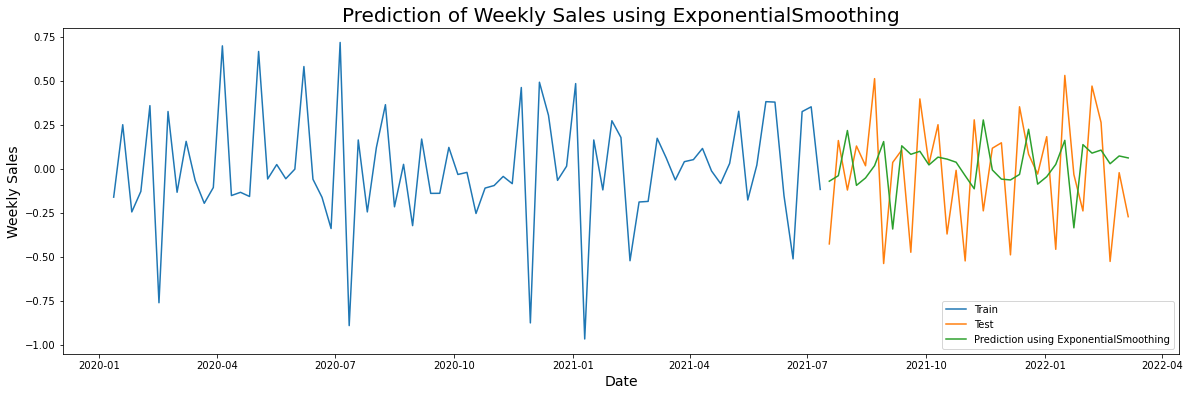

In [64]:
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [66]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['Holiday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [67]:
# weighted mean absolute error (WMAE)

wmae_test(test_data_diff, y_pred)

0.2794154610745388

In [96]:
y_pred.reset_index(inplace=True)

In [97]:
y_pred1.reset_index(inplace=True)

In [98]:
#y_pred1

,date,holt_winters_Pred
0,2021-07-11,NaN
1,2021-07-18,-0.071890
2,2021-07-25,-0.040509
3,2021-08-01,0.216054
4,2021-08-08,-0.095571
5,2021-08-15,-0.053341
6,2021-08-22,0.016672
7,2021-08-29,0.153316
8,2021-09-05,-0.343513
9,2021-09-12,0.129142


In [99]:
predict_final= pd.merge(y_pred, y_pred1, on= 'date', how='inner')

In [100]:
predict_final

,index,date,Arima_Pred,holt_winters_Pred
0,0,2021-07-11,NaN,NaN
1,1,2021-07-18,-0.053798,-0.071890
2,2,2021-07-25,-0.003611,-0.040509
3,3,2021-08-01,-0.003611,0.216054
4,4,2021-08-08,-0.003611,-0.095571
5,5,2021-08-15,-0.003611,-0.053341
6,6,2021-08-22,-0.003611,0.016672
7,7,2021-08-29,-0.003611,0.153316
8,8,2021-09-05,-0.003611,-0.343513
9,9,2021-09-12,-0.003611,0.129142


In [104]:
predict_final.drop(['index'], axis=1, inplace=True)

In [106]:
predict_final['date']= predict_final['date'].astype(str) #conveting into str to avoid hh/mm/ss

In [107]:
predict_final.to_excel('Sales_Prediction.xlsx', index= False)